In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf


In [2]:
def Get_weighted_average(value,error):
    #Factor is 1, it's a ratio, so no need to convert unit
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        if error[i]==0:
            print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_propagation_sum(a1,V1,E1,a2,V2,E2):
    return math.sqrt(a1*a1*E1*E1+a2*a2*E2*E2)
def Get_propagation_diff(a1,V1,E1,a2,V2,E2):
    return math.sqrt(a1**2*E1*E1+a2**2*E2*E2)
def Get_propagation_divide(V1,E1,V2,E2):
    return V1/V2*math.sqrt((E1/V1)**2+(E2/V2)**2)


In [3]:
CT10nlo = lhapdf.mkPDF("CT10nlo",0)
CJ15lo = lhapdf.mkPDF("CJ15lo",0)
CJ15nlo = lhapdf.mkPDF("CJ15nlo",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo",0)

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15nlo/CJ15nlo_0000.dat
CJ15nlo PDF set, member #0, version 2; LHAPDF ID = 12400
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2; LHAPDF ID = 951500


In [4]:
def Get_sum_ratio(xbj,Q,PDF_set):
    u = PDF_set.xfxQ(2,xbj,Q)
    d = PDF_set.xfxQ(1,xbj,Q)
    ub = PDF_set.xfxQ(-2,xbj,Q)
    db = PDF_set.xfxQ(-1,xbj,Q)
    sum_ratio = (4*u+4*ub+d+db)/(u+ub+4*d+4*db)
    return sum_ratio
def Get_diff_ratio(xbj,Q,PDF_set):
    
    u = PDF_set.xfxQ(2,xbj,Q)
    d = PDF_set.xfxQ(1,xbj,Q)
    ub = PDF_set.xfxQ(-2,xbj,Q)
    db = PDF_set.xfxQ(-1,xbj,Q)
    uv = u-ub
    dv = d-db
    diff_raito = (4*uv-dv)/(4*dv-uv)
    return diff_ratio

In [5]:
df_pip_H2 = pd.read_csv('inputs/simenhanced_H2_pip.csv',delim_whitespace=True)
df_pip_H2.head()


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.131034,-2.797876,0.505134,0.323138,1.342990,0.071165,FUUT,0.237853,0.003179,0.0,0.0,proton,pi+,solid,0.003179
1,1,11.0,0.139816,-2.000524,0.481442,0.323278,1.370244,0.069795,FUUT,0.238994,0.003159,0.0,0.0,proton,pi+,solid,0.003159
2,2,11.0,0.157988,0.168255,0.438805,0.324290,1.419614,0.060276,FUUT,0.240858,0.003169,0.0,0.0,proton,pi+,solid,0.003169
3,3,11.0,0.138352,2.109612,0.485406,0.323261,1.366105,0.070203,FUUT,0.238621,0.003154,0.0,0.0,proton,pi+,solid,0.003154
4,4,11.0,0.130828,2.839464,0.505851,0.323067,1.342757,0.071210,FUUT,0.237810,0.003392,0.0,0.0,proton,pi+,solid,0.003392


In [6]:
df_pim_H2 = pd.read_csv('inputs/simenhanced_H2_pim.csv',delim_whitespace=True)
df_pim_H2.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.132036,-2.616068,0.502104,0.322987,1.345986,0.071252,FUUT,0.157359,0.003170,0.0,0.0,proton,pi-,solid,0.003170
1,1,11.0,0.152514,-0.465544,0.451187,0.323688,1.405029,0.063464,FUUT,0.154935,0.003167,0.0,0.0,proton,pi-,solid,0.003167
2,2,11.0,0.135134,2.325624,0.494008,0.323020,1.356219,0.070829,FUUT,0.156795,0.003158,0.0,0.0,proton,pi-,solid,0.003158
3,3,11.0,0.129242,3.018274,0.509994,0.322836,1.337134,0.071424,FUUT,0.157880,0.006404,0.0,0.0,proton,pi-,solid,0.006404
4,4,11.0,0.108421,-3.031114,0.581285,0.322934,1.276498,0.157321,FUUT,0.141998,0.003176,0.0,0.0,proton,pi-,solid,0.003176


In [7]:
df_pip_He3 = pd.read_csv('inputs/simenhancedNpip_He3_try1.csv',delim_whitespace=True)
df_pip_He3.head()


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.133955,-2.490683,0.497003,0.323128,1.351855,0.070835,FUUT,0.182171,0.000317,0.0,0.0,neutron,pi+,solid,0.000317
1,1,11.0,0.150608,0.576860,0.455791,0.323806,1.399777,0.064366,FUUT,0.177297,0.000316,0.0,0.0,neutron,pi+,solid,0.000316
2,2,11.0,0.131707,2.698964,0.503377,0.323202,1.345657,0.071121,FUUT,0.182466,0.000376,0.0,0.0,neutron,pi+,solid,0.000376
3,3,11.0,0.108902,-3.006048,0.579656,0.323177,1.278501,0.157057,FUUT,0.166536,0.000317,0.0,0.0,neutron,pi+,solid,0.000317
4,4,11.0,0.110348,-2.727873,0.574003,0.323130,1.282510,0.157142,FUUT,0.166478,0.000312,0.0,0.0,neutron,pi+,solid,0.000312


In [8]:
df_pim_He3 = pd.read_csv('inputs/simenhancedNpim_He3_try1.csv',delim_whitespace=True)
df_pim_He3.head()


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.139515,-2.107120,0.483490,0.323347,1.367370,0.068441,FUUT,0.154379,0.000318,0.0,0.0,neutron,pi-,solid,0.000318
1,1,11.0,0.138596,2.178892,0.485648,0.323243,1.365243,0.069150,FUUT,0.154659,0.000323,0.0,0.0,neutron,pi-,solid,0.000323
2,2,11.0,0.108668,-2.958992,0.580323,0.323022,1.277120,0.157150,FUUT,0.141984,0.000318,0.0,0.0,neutron,pi-,solid,0.000318
3,3,11.0,0.111275,-2.581655,0.569951,0.322989,1.283855,0.157512,FUUT,0.141965,0.000315,0.0,0.0,neutron,pi-,solid,0.000315
4,4,11.0,0.117504,-2.170419,0.547120,0.322890,1.300712,0.158190,FUUT,0.141723,0.000316,0.0,0.0,neutron,pi-,solid,0.000316


In [9]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#z_cuts=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,3.5,4,4.5,5]
xbj_cuts=[0,0.25,0.5,0.7]

PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5]

#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
Ebeam = 11
df_pip_H2_11 = df_pip_H2[(df_pip_H2['Ebeam']==Ebeam)]
df_pim_H2_11 = df_pim_H2[(df_pim_H2['Ebeam']==Ebeam)]
df_pip_He3_11 = df_pip_He3[(df_pip_He3['Ebeam']==Ebeam)]
df_pim_He3_11 = df_pim_He3[(df_pim_He3['Ebeam']==Ebeam)]
df_pip_H2_11.head()

3.141592653589793


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.131034,-2.797876,0.505134,0.323138,1.342990,0.071165,FUUT,0.237853,0.003179,0.0,0.0,proton,pi+,solid,0.003179
1,1,11.0,0.139816,-2.000524,0.481442,0.323278,1.370244,0.069795,FUUT,0.238994,0.003159,0.0,0.0,proton,pi+,solid,0.003159
2,2,11.0,0.157988,0.168255,0.438805,0.324290,1.419614,0.060276,FUUT,0.240858,0.003169,0.0,0.0,proton,pi+,solid,0.003169
3,3,11.0,0.138352,2.109612,0.485406,0.323261,1.366105,0.070203,FUUT,0.238621,0.003154,0.0,0.0,proton,pi+,solid,0.003154
4,4,11.0,0.130828,2.839464,0.505851,0.323067,1.342757,0.071210,FUUT,0.237810,0.003392,0.0,0.0,proton,pi+,solid,0.003392


In [10]:
xl = xbj_cuts[0]
xr = xbj_cuts[2]
Q2l = Q2_cuts[2]
Q2r = Q2_cuts[3]

zl = z_cuts[0]
zr = z_cuts[-1]
PhTl = PhT_cuts[0]
PhTr = PhT_cuts[1]
print('x cuts: ',xl,' to ',xr,' Q2 cuts: ',Q2l,' to ',Q2r,' z range ',zl,' to ',zr,' PhT cut ',PhTl,' to ',PhTr)

x cuts:  0  to  0.5  Q2 cuts:  2  to  2.5  z range  0.3  to  0.6  PhT cut  0  to  0.1


In [11]:
df_pip_H2_11_cuts = df_pip_H2_11[(df_pip_H2_11['x']>xl)&(df_pip_H2_11['x']<xr)&(df_pip_H2_11['Q2']>Q2l)&(df_pip_H2_11['Q2']<Q2r)&(df_pip_H2_11['z']>zl)&(df_pip_H2_11['z']<zr)&(df_pip_H2_11['pT']>PhTl)&(df_pip_H2_11['pT']<PhTr)]
print(len(df_pip_H2_11_cuts))
print(df_pip_H2_11_cuts)
df_pim_H2_11_cuts = df_pim_H2_11[(df_pim_H2_11['x']>xl)&(df_pim_H2_11['x']<xr)&(df_pim_H2_11['Q2']>Q2l)&(df_pim_H2_11['Q2']<Q2r)&(df_pim_H2_11['z']>zl)&(df_pim_H2_11['z']<zr)&(df_pim_H2_11['pT']>PhTl)&(df_pim_H2_11['pT']<PhTr)]


42
         i  Ebeam         x      phih         y         z        Q2        pT   
1019  1019   11.0  0.201236 -2.870754  0.542698  0.323220  2.223165  0.067622  \
1020  1020   11.0  0.205047 -2.323203  0.531178  0.323240  2.219137  0.067850   
1021  1021   11.0  0.211580 -1.728731  0.511676  0.323336  2.211949  0.067495   
1022  1022   11.0  0.220923 -0.961145  0.486294  0.323655  2.204950  0.063653   
1023  1023   11.0  0.226067  0.259213  0.473422  0.324089  2.200247  0.059117   
1024  1024   11.0  0.216895  1.290255  0.496941  0.323513  2.208548  0.065752   
1025  1025   11.0  0.208776  1.959902  0.519924  0.323346  2.214845  0.067687   
1026  1026   11.0  0.203286  2.527262  0.536200  0.323369  2.220043  0.067678   
1027  1027   11.0  0.201098  2.971753  0.543163  0.323297  2.223276  0.067526   
1028  1028   11.0  0.271566 -1.551575  0.408896  0.323459  2.284958  0.062941   
1029  1029   11.0  0.287905 -0.429906  0.381366  0.323226  2.253012  0.068978   
1030  1030   11.0  0.2880

In [12]:
df_pip_He3_11_cuts = df_pip_He3_11[(df_pip_He3_11['x']>xl)&(df_pip_He3_11['x']<xr)&(df_pip_He3_11['Q2']>Q2l)&(df_pip_He3_11['Q2']<Q2r)&(df_pip_He3_11['z']>zl)&(df_pip_He3_11['z']<zr)&(df_pip_He3_11['pT']>PhTl)&(df_pip_He3_11['pT']<PhTr)]
print(len(df_pip_He3_11_cuts))
print(df_pip_He3_11_cuts)
df_pim_He3_11_cuts = df_pim_He3_11[(df_pim_He3_11['x']>xl)&(df_pim_He3_11['x']<xr)&(df_pim_He3_11['Q2']>Q2l)&(df_pim_He3_11['Q2']<Q2r)&(df_pim_He3_11['z']>zl)&(df_pim_He3_11['z']<zr)&(df_pim_He3_11['pT']>PhTl)&(df_pim_He3_11['pT']<PhTr)]


28
       i  Ebeam         x      phih         y         z        Q2        pT   
588  588   11.0  0.202203 -2.679250  0.539375  0.323298  2.220645  0.067809  \
589  589   11.0  0.212028 -1.679228  0.510493  0.323472  2.211864  0.066907   
590  590   11.0  0.224576 -0.042764  0.477058  0.323845  2.201807  0.060793   
591  591   11.0  0.212430  1.631096  0.509206  0.323474  2.211101  0.066900   
592  592   11.0  0.202547  2.643064  0.538398  0.323455  2.220503  0.067664   
593  593   11.0  0.200350  3.125449  0.544852  0.323301  2.221651  0.067525   
594  594   11.0  0.278071 -1.111348  0.397665  0.323326  2.270808  0.065325   
595  595   11.0  0.285428  0.514785  0.384737  0.323161  2.254194  0.068661   
596  596   11.0  0.265383  1.949124  0.421436  0.323527  2.305525  0.058126   
660  660   11.0  0.205844 -2.444008  0.528416  0.373403  2.217189  0.067609   
661  661   11.0  0.220293 -0.624810  0.488078  0.373726  2.205683  0.063380   
662  662   11.0  0.212270  1.670752  0.509965  0.

Text(0, 0.5, 'xs')

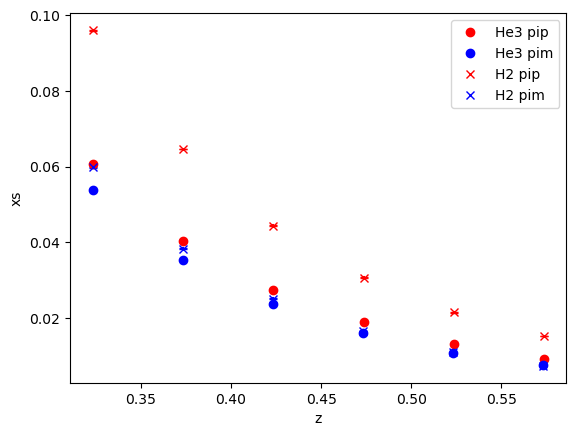

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
z_He3_pip_bin = []
xs_He3_pip_bin = []
z_He3_pim_bin = []
xs_He3_pim_bin = []
z_H2_pip_bin = []
xs_H2_pip_bin = []
z_H2_pim_bin = []
xs_H2_pim_bin = []
for i_z in range(0,len(z_cuts)-1):
    zil = z_cuts[i_z]
    zir = z_cuts[i_z+1]
    zs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['z'].to_list()
    errs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['stat'].to_list()
    xss_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['value'].to_list()
    try:
        z_He3_pip = Get_weighted_average(zs_He3_pip,errs_He3_pip)[0]
        err_He3_pip = Get_weighted_average(zs_He3_pip,errs_He3_pip)[1]
        xs_He3_pip = Get_weighted_average(xss_He3_pip,errs_He3_pip)[0]
    except ZeroDivisionError as err:
        print("z",z_cuts[i_z])
    z_He3_pip_bin.append(z_He3_pip)
    xs_He3_pip_bin.append(xs_He3_pip)
    #print('weighted: ',z_He3_pip,' lists: ',zs_He3_pip)
    zs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['z'].to_list()
    errs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['stat'].to_list()
    xss_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['value'].to_list()
    z_He3_pim = Get_weighted_average(zs_He3_pim,errs_He3_pim)[0]
    err_He3_pim = Get_weighted_average(zs_He3_pim,errs_He3_pim)[1]
    xs_He3_pim = Get_weighted_average(xss_He3_pim,errs_He3_pim)[0]
    z_He3_pim_bin.append(z_He3_pim)
    xs_He3_pim_bin.append(xs_He3_pim)
    zs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[0]
    err_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[1]
    xs_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]
    z_H2_pip_bin.append(z_H2_pip)
    xs_H2_pip_bin.append(xs_H2_pip)
    #print('weighted: ',z_H2_pip,' lists: ',zs_H2_pip)
    zs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[0]
    err_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[1]
    xs_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]
    z_H2_pim_bin.append(z_H2_pim)
    xs_H2_pim_bin.append(xs_H2_pim)
    #plt.plot(z_He3_pip,xs_He3_pip,'bo')
    ax.plot([z_He3_pip,z_He3_pip],[xs_He3_pip-xs_He3_pip*err_He3_pip,xs_He3_pip+xs_He3_pip*err_He3_pip],color = 'red',marker = '_')
    ax.plot([z_He3_pim,z_He3_pim],[xs_He3_pim-xs_He3_pim*err_He3_pim,xs_He3_pim+xs_He3_pim*err_He3_pim],color = 'blue',marker = '_')
    ax.plot([z_H2_pip,z_H2_pip],[xs_H2_pip-xs_H2_pip*err_H2_pip,xs_H2_pip+xs_H2_pip*err_H2_pip],color = 'red',marker = '_')
    ax.plot([z_H2_pim,z_H2_pim],[xs_H2_pim-xs_H2_pim*err_H2_pim,xs_H2_pim+xs_H2_pim*err_H2_pim],color = 'blue',marker = '_')
plt.plot(z_He3_pip_bin,xs_He3_pip_bin,'ro',label='He3 pip')
plt.plot(z_He3_pim_bin,xs_He3_pim_bin,'bo',label='He3 pim')
plt.plot(z_H2_pip_bin,xs_H2_pip_bin,'rx',label='H2 pip')
plt.plot(z_H2_pim_bin,xs_H2_pim_bin,'bx',label='H2 pim')     
plt.legend()
plt.xlabel('z')
plt.ylabel('xs')

z:  0.3233521853057111  xbj : 0.2318690673947493  Q2:  2.2304463970241897
z:  0.37336758500058237  xbj : 0.23147181458435628  Q2:  2.2300808257725713
z:  0.4233544199416256  xbj : 0.23097685612835858  Q2:  2.2293163737589974
z:  0.4734203338486135  xbj : 0.2307891746736132  Q2:  2.2285359587922486
z:  0.5235112055865904  xbj : 0.23056595121919113  Q2:  2.2286603148199764
z:  0.5734806685797448  xbj : 0.2302182460949798  Q2:  2.2280377381062695


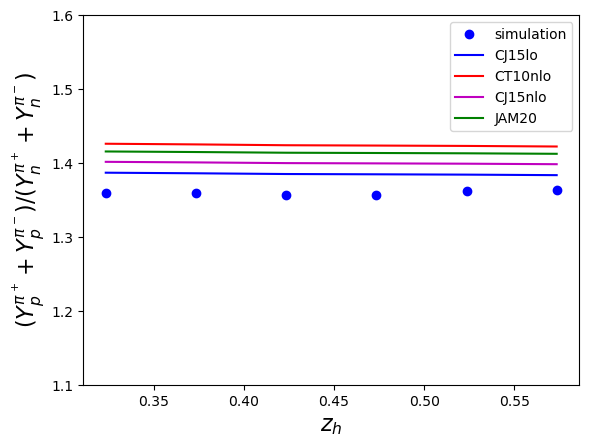

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
z_sum_bin = []
xs_sum_bin = []
sum_ratio_bins_CJ15lo = []
sum_ratio_bins_CT10nlo = []
sum_ratio_bins_CJ15nlo = []
sum_ratio_bins_JAM20 = []
for i_z in range(0,len(z_cuts)-1):
    zil = z_cuts[i_z]
    zir = z_cuts[i_z+1]
    zs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['z'].to_list()
    errs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['stat'].to_list()
    xss_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['value'].to_list()
    z_He3_pip = Get_weighted_average(zs_He3_pip,errs_He3_pip)[0]
    xs_He3_pip = Get_weighted_average(xss_He3_pip,errs_He3_pip)[0]
    err_He3_pip = Get_weighted_average(xss_He3_pip,errs_He3_pip)[0]*Get_weighted_average(xss_He3_pip,errs_He3_pip)[1]
    xbjs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['x'].to_list()
    Q2s_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_He3_pip = Get_weighted_average(xbjs_He3_pip,errs_He3_pip)[0]
    Q2_He3_pip = Get_weighted_average(Q2s_He3_pip,errs_He3_pip)[0]
    
    #print('weighted: ',z_He3_pip,' lists: ',zs_He3_pip)
    zs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['z'].to_list()
    errs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['stat'].to_list()
    xss_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['value'].to_list()
    z_He3_pim = Get_weighted_average(zs_He3_pim,errs_He3_pim)[0]
    xs_He3_pim = Get_weighted_average(xss_He3_pim,errs_He3_pim)[0]
    err_He3_pim = Get_weighted_average(xss_He3_pim,errs_He3_pim)[0]*Get_weighted_average(xss_He3_pim,errs_He3_pim)[1]
    xbjs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['x'].to_list()
    Q2s_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_He3_pim = Get_weighted_average(xbjs_He3_pim,errs_He3_pim)[0]
    Q2_He3_pim = Get_weighted_average(Q2s_He3_pim,errs_He3_pim)[0]

    zs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[0]
    xs_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]
    err_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]*Get_weighted_average(xss_H2_pip,errs_H2_pip)[1]
    xbjs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pip = Get_weighted_average(xbjs_H2_pip,errs_H2_pip)[0]
    Q2_H2_pip = Get_weighted_average(Q2s_H2_pip,errs_H2_pip)[0]

    #print('weighted: ',z_H2_pip,' lists: ',zs_H2_pip)
    zs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[0]
    xs_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]
    err_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]*Get_weighted_average(xss_H2_pim,errs_H2_pim)[1]
    xbjs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pim = Get_weighted_average(xbjs_H2_pim,errs_H2_pim)[0]
    Q2_H2_pim = Get_weighted_average(Q2s_H2_pim,errs_H2_pim)[0]

    z_sum = Get_weighted_average([z_He3_pip,z_He3_pim,z_H2_pip,z_H2_pim],[err_He3_pip,err_He3_pim,err_H2_pip,err_H2_pim])[0]
    z_sum_bin.append(z_sum)
    #plt.plot(z_He3_pip,xs_He3_pip,'bo')
    sum_H2 = xs_H2_pip+xs_H2_pim
    sum_He3 = xs_He3_pip+xs_He3_pim
    sum_H2_err = Get_propagation_sum(1,xs_H2_pip,err_H2_pip,1,xs_H2_pim,err_H2_pim)
    sum_He3_err = Get_propagation_sum(1,xs_He3_pip,err_He3_pip,1,xs_He3_pim,err_He3_pim)
    sum_ratio = sum_H2/(sum_He3)
    sum_ratio_err = Get_propagation_divide(sum_H2,sum_H2_err,sum_He3,sum_He3_err)
    xs_sum_bin.append(sum_ratio)
    ax.plot([z_sum,z_sum],[sum_ratio-sum_ratio_err,sum_ratio+sum_ratio_err],'b')
    
    #xbj_sum = (xbj_He3_pip+xbj_He3_pim+xbj_H2_pip+xbj_H2_pim)/4
    #Q2_sum = (Q2_He3_pip+Q2_He3_pim+Q2_H2_pip+Q2_H2_pim)/4
    xbj_sum = Get_weighted_average([xbj_He3_pip,xbj_He3_pim,xbj_H2_pip,xbj_H2_pim],[err_He3_pip,err_He3_pim,err_H2_pip,err_H2_pim])[0]
    Q2_sum = Get_weighted_average([Q2_He3_pip,Q2_He3_pim,Q2_H2_pip,Q2_H2_pim],[err_He3_pip,err_He3_pim,err_H2_pip,err_H2_pim])[0]
    print('z: ',z_sum,' xbj :',xbj_sum,' Q2: ', Q2_sum)
    sum_ratio_CJ15lo = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),CJ15lo)
    sum_ratio_CT10nlo = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),CT10nlo)
    sum_ratio_bins_CJ15lo.append(sum_ratio_CJ15lo)
    sum_ratio_bins_CT10nlo.append(sum_ratio_CT10nlo)
    sum_ratio_CJ15nlo = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),CJ15nlo)
    sum_ratio_JAM20 = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),JAM20)
    sum_ratio_bins_CJ15nlo.append(sum_ratio_CJ15nlo)
    sum_ratio_bins_JAM20.append(sum_ratio_JAM20)
plt.plot(z_sum_bin,xs_sum_bin,'bo',label='simulation') 
plt.plot(z_sum_bin,sum_ratio_bins_CJ15lo,'b',label='CJ15lo')
plt.plot(z_sum_bin,sum_ratio_bins_CT10nlo,'r',label='CT10nlo')
plt.plot(z_sum_bin,sum_ratio_bins_CJ15nlo,'m',label='CJ15nlo')
plt.plot(z_sum_bin,sum_ratio_bins_JAM20,'g',label='JAM20')

plt.ylim(1.1,1.6)
plt.legend()
plt.xlabel(r'$z_h$',fontsize=16)
plt.ylabel('${(Y_{p}^{\pi^+}+Y_{p}^{\pi^-})}/{(Y_{n}^{\pi^+}+Y_{n}^{\pi^-})}$',fontsize=16)

plt.savefig('results/He3_sum_ratio.pdf')

z:  0.3233521853057111  xbj : 0.2318690673947493  Q2:  2.2304463970241897
5.282662017229461 5.282662017229461 5.282662017229461 5.282662017229461
z:  0.37336758500058237  xbj : 0.23147181458435628  Q2:  2.2300808257725713
5.11807517006294 5.11807517006294 5.11807517006294 5.11807517006294
z:  0.4233544199416256  xbj : 0.23097685612835858  Q2:  2.2293163737589974
5.054424479538593 5.054424479538593 5.054424479538593 5.054424479538593
z:  0.4734203338486135  xbj : 0.2307891746736132  Q2:  2.2285359587922486
5.008939241521141 5.008939241521141 5.008939241521141 5.008939241521141
z:  0.5235112055865904  xbj : 0.23056595121919113  Q2:  2.2286603148199764
4.699732209711529 4.699732209711529 4.699732209711529 4.699732209711529
z:  0.5734806685797448  xbj : 0.2302182460949798  Q2:  2.2280377381062695
4.911923158047285 4.911923158047285 4.911923158047285 4.911923158047285


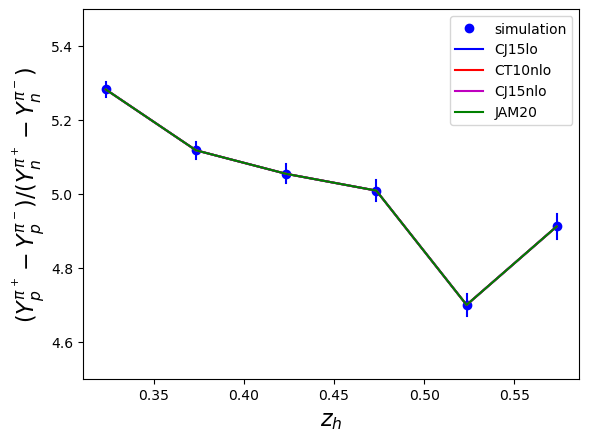

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
z_diff_bin = []
xs_diff_bin = []
diff_ratio_bins_CJ15lo = []
diff_ratio_bins_CT10nlo = []
diff_ratio_bins_CJ15nlo = []
diff_ratio_bins_JAM20 = []
for i_z in range(0,len(z_cuts)-1):
    zil = z_cuts[i_z]
    zir = z_cuts[i_z+1]
    zs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['z'].to_list()
    errs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['stat'].to_list()
    xss_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['value'].to_list()
    z_He3_pip = Get_weighted_average(zs_He3_pip,errs_He3_pip)[0]
    xs_He3_pip = Get_weighted_average(xss_He3_pip,errs_He3_pip)[0]
    err_He3_pip = Get_weighted_average(xss_He3_pip,errs_He3_pip)[0]*Get_weighted_average(xss_He3_pip,errs_He3_pip)[1]
    xbjs_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['x'].to_list()
    Q2s_He3_pip = df_pip_He3_11_cuts[(df_pip_He3_11_cuts['z']>zil)&(df_pip_He3_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_He3_pip = Get_weighted_average(xbjs_He3_pip,errs_He3_pip)[0]
    Q2_He3_pip = Get_weighted_average(Q2s_He3_pip,errs_He3_pip)[0]
    
    #print('weighted: ',z_He3_pip,' lists: ',zs_He3_pip)
    zs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['z'].to_list()
    errs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['stat'].to_list()
    xss_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['value'].to_list()
    z_He3_pim = Get_weighted_average(zs_He3_pim,errs_He3_pim)[0]
    xs_He3_pim = Get_weighted_average(xss_He3_pim,errs_He3_pim)[0]
    err_He3_pim = Get_weighted_average(xss_He3_pim,errs_He3_pim)[0]*Get_weighted_average(xss_He3_pim,errs_He3_pim)[1]
    xbjs_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['x'].to_list()
    Q2s_He3_pim = df_pim_He3_11_cuts[(df_pim_He3_11_cuts['z']>zil)&(df_pim_He3_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_He3_pim = Get_weighted_average(xbjs_He3_pim,errs_He3_pim)[0]
    Q2_He3_pim = Get_weighted_average(Q2s_He3_pim,errs_He3_pim)[0]

    zs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[0]
    xs_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]
    err_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]*Get_weighted_average(xss_H2_pip,errs_H2_pip)[1]
    xbjs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pip = Get_weighted_average(xbjs_H2_pip,errs_H2_pip)[0]
    Q2_H2_pip = Get_weighted_average(Q2s_H2_pip,errs_H2_pip)[0]

    #print('weighted: ',z_H2_pip,' lists: ',zs_H2_pip)
    zs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[0]
    xs_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]
    err_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]*Get_weighted_average(xss_H2_pim,errs_H2_pim)[1]
    xbjs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pim = Get_weighted_average(xbjs_H2_pim,errs_H2_pim)[0]
    Q2_H2_pim = Get_weighted_average(Q2s_H2_pim,errs_H2_pim)[0]

    z_diff = Get_weighted_average([z_He3_pip,z_He3_pim,z_H2_pip,z_H2_pim],[err_He3_pip,err_He3_pim,err_H2_pip,err_H2_pim])[0]
    z_diff_bin.append(z_diff)
    #plt.plot(z_He3_pip,xs_He3_pip,'bo')
    diff_H2 = xs_H2_pip-xs_H2_pim
    diff_He3 = xs_He3_pip-xs_He3_pim
    diff_H2_err = Get_propagation_diff(1,xs_H2_pip,err_H2_pip,1,xs_H2_pim,err_H2_pim)
    diff_He3_err = Get_propagation_diff(1,xs_He3_pip,err_He3_pip,1,xs_He3_pim,err_He3_pim)
    diff_ratio = diff_H2/(diff_He3)
    diff_ratio_err = Get_propagation_divide(diff_H2,diff_H2_err,diff_He3,diff_He3_err)
    xs_diff_bin.append(diff_ratio)
    ax.plot([z_diff,z_diff],[diff_ratio-diff_ratio_err,diff_ratio+diff_ratio_err],'b')
    
    #xbj_diff = (xbj_He3_pip+xbj_He3_pim+xbj_H2_pip+xbj_H2_pim)/4
    #Q2_diff = (Q2_He3_pip+Q2_He3_pim+Q2_H2_pip+Q2_H2_pim)/4
    xbj_diff = Get_weighted_average([xbj_He3_pip,xbj_He3_pim,xbj_H2_pip,xbj_H2_pim],[err_He3_pip,err_He3_pim,err_H2_pip,err_H2_pim])[0]
    Q2_diff = Get_weighted_average([Q2_He3_pip,Q2_He3_pim,Q2_H2_pip,Q2_H2_pim],[err_He3_pip,err_He3_pim,err_H2_pip,err_H2_pim])[0]
    print('z: ',z_diff,' xbj :',xbj_diff,' Q2: ', Q2_diff)
    diff_ratio_CJ15lo = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),CJ15lo)
    diff_ratio_CT10nlo = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),CT10nlo)
    diff_ratio_bins_CJ15lo.append(diff_ratio_CJ15lo)
    diff_ratio_bins_CT10nlo.append(diff_ratio_CT10nlo)
    diff_ratio_CJ15nlo = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),CJ15nlo)
    diff_ratio_JAM20 = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),JAM20)
    diff_ratio_bins_CJ15nlo.append(diff_ratio_CJ15nlo)
    diff_ratio_bins_JAM20.append(diff_ratio_JAM20)
    print(diff_ratio_CJ15lo,diff_ratio_CJ15nlo,diff_ratio_CT10nlo,diff_ratio_JAM20)
plt.plot(z_diff_bin,xs_diff_bin,'bo',label='simulation') 
plt.plot(z_diff_bin,diff_ratio_bins_CJ15lo,'b',label='CJ15lo')
plt.plot(z_diff_bin,diff_ratio_bins_CT10nlo,'r',label='CT10nlo')
plt.plot(z_diff_bin,diff_ratio_bins_CJ15nlo,'m',label='CJ15nlo')
plt.plot(z_diff_bin,diff_ratio_bins_JAM20,'g',label='JAM20')

plt.ylim(4.5,5.5)
plt.legend()
plt.xlabel(r'$z_h$',fontsize=16)
plt.ylabel('${(Y_{p}^{\pi^+}-Y_{p}^{\pi^-})}/{(Y_{n}^{\pi^+}-Y_{n}^{\pi^-})}$',fontsize=16)

plt.savefig('results/He3_diff_ratio.pdf')